Weather Research and Forecasting (WRF) is a numerical weather prediction (NWP) system designed to serve both atmospheric research and operational forecasting needs. NWP refers to the simulation and prediction of the atmosphere with a computer model, and WRF is a set of software for this. WRF features two dynamical (computational) cores (or solvers), a data assimilation system, and a software architecture allowing for parallel computation and system extensibility. The model serves a wide range of meteorological applications across scales ranging from meters to thousands of kilometers. The effort to develop WRF began in the latter part of the 1990s and was a collaborative partnership principally among the National Center for Atmospheric Research (NCAR), the National Oceanic and Atmospheric Administration (represented by the National Centers for Environmental Prediction (NCEP) and the (then) Forecast Systems Laboratory (FSL)), the Air Force Weather Agency (AFWA), the Naval Research Laboratory (NRL), the University of Oklahoma (OU), and the Federal Aviation Administration (FAA). The bulk of the work on the model has been performed or supported by NCAR, NOAA, and AFWA. WRF allows researchers to produce simulations reflecting either real data (observations, analyses) or idealized atmospheric conditions. WRF provides operational forecasting a flexible and robust platform, while offering advances in physics, numerics, and data assimilation contributed by the many research community developers. WRF is currently in operational use at NCEP and other forecasting centers internationally. WRF has grown to have a large worldwide community of users (over 23,000 registered users in over 150 countries), and workshops and tutorials are held each year at NCAR. WRF is used extensively for research and real-time forecasting throughout the world.

In [1]:
import pandas as pd
import xarray as xr
import pyart
from matplotlib import pyplot as plt
%matplotlib inline
import urllib.request
import numpy as np
print(pyart.__version__)
import seaborn as sns

C:\Users\Andrew\Anaconda3\lib\site-packages\pyart\map\grid_mapper.py:40: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  from .ball_tree import BallTree
C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figu

1.6.0


In [2]:
#reading the data into an xarray data frame
data = xr.DataArray('wrfout_d01_2004-12-16_03_00_00.nc')
ds = data.to_dataset(name = 'wrfout_d01_2004-12-16_03_00_00.nc')
ds.to_netcdf
radar = xr.open_dataset('wrfout_d01_2004-12-16_03_00_00')
radar

C:\Users\Andrew\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\Andrew\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


<xarray.Dataset>
Dimensions:              (Time: 6, bottom_top: 99, bottom_top_stag: 100, soil_layers_stag: 5, south_north: 128, south_north_stag: 129, west_east: 128, west_east_stag: 129)
Coordinates:
    XLAT                 (Time, south_north, west_east) float32 18.0 18.0 ...
    XLONG                (Time, south_north, west_east) float32 -62.0 -62.0 ...
    XLAT_U               (Time, south_north, west_east_stag) float32 0.0 0.0 ...
    XLONG_U              (Time, south_north, west_east_stag) float32 0.0 0.0 ...
    XLAT_V               (Time, south_north_stag, west_east) float32 0.0 0.0 ...
    XLONG_V              (Time, south_north_stag, west_east) float32 0.0 0.0 ...
  * Time                 (Time) int64 0 1 2 3 4 5
  * bottom_top           (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
  * bottom_top_stag      (bottom_top_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  * soil_layers_stag     (soil_layers_stag) int64 0 1 2 3 4
  * south_north          (south_north) int64 0 

In [3]:
dir(radar)

['ACGRDFLX',
 'ACHFX',
 'ACLHF',
 'ACSNOM',
 'AER_ANGEXP_OPT',
 'AER_ANGEXP_VAL',
 'AER_AOD550_OPT',
 'AER_AOD550_VAL',
 'AER_ASY_OPT',
 'AER_ASY_VAL',
 'AER_OPT',
 'AER_SSA_OPT',
 'AER_SSA_VAL',
 'AER_TYPE',
 'AFWA_CAPE',
 'AFWA_CLOUD_CEIL',
 'AFWA_HAIL',
 'AFWA_LLWS',
 'AFWA_PLFC',
 'AFWA_TORNADO',
 'AFWA_ZLFC',
 'ALBBCK',
 'ALBEDO',
 'BLDT',
 'BL_PBL_PHYSICS',
 'BOTTOM-TOP_GRID_DIMENSION',
 'BOTTOM-TOP_PATCH_END_STAG',
 'BOTTOM-TOP_PATCH_END_UNSTAG',
 'BOTTOM-TOP_PATCH_START_STAG',
 'BOTTOM-TOP_PATCH_START_UNSTAG',
 'BUCKET_J',
 'BUCKET_MM',
 'CANWAT',
 'CEN_LAT',
 'CEN_LON',
 'CF1',
 'CF2',
 'CF3',
 'CFN',
 'CFN1',
 'CLAT',
 'CLDFRA',
 'COSALPHA',
 'COSZEN',
 'CUDT',
 'CU_PHYSICS',
 'DAMPCOEF',
 'DAMP_OPT',
 'DFI_OPT',
 'DIFF_6TH_FACTOR',
 'DIFF_6TH_OPT',
 'DIFF_OPT',
 'DN',
 'DNW',
 'DT',
 'DX',
 'DY',
 'DZS',
 'E',
 'EMISS',
 'F',
 'FEEDBACK',
 'FNM',
 'FNP',
 'GFDDA_END_H',
 'GFDDA_INTERVAL_M',
 'GLW',
 'GMT',
 'GRAUPELNC',
 'GRAV_SETTLING',
 'GRDFLX',
 'GRIDTYPE',
 'GRID_FDDA',

In [4]:
#I'm using QVAPOR for printing out min and max water content
radar.QVAPOR

<xarray.DataArray 'QVAPOR' (Time: 6, bottom_top: 99, south_north: 128, west_east: 128)>
[9732096 values with dtype=float32]
Coordinates:
    XLAT         (Time, south_north, west_east) float32 18.0 18.0 18.0 18.0 ...
    XLONG        (Time, south_north, west_east) float32 -62.0 -62.0 -62.0 ...
  * Time         (Time) int64 0 1 2 3 4 5
  * bottom_top   (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * south_north  (south_north) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * west_east    (west_east) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
Attributes:
    FieldType: 104
    MemoryOrder: XYZ
    description: Water vapor mixing ratio
    units: kg kg-1
    stagger: 

In [5]:
radar.variables


Frozen(OrderedDict([('Times', <xarray.Variable (Time: 6)>
array([b'2004-12-16_03:00:00', b'2004-12-16_03:10:00',
       b'2004-12-16_03:20:00', b'2004-12-16_03:30:00',
       b'2004-12-16_03:40:00', b'2004-12-16_03:50:00'], 
      dtype='|S19')), ('XLAT', <xarray.Variable (Time: 6, south_north: 128, west_east: 128)>
array([[[ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        ..., 
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.]],

       [[ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        ..., 
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.]],

       [[ 18.,  18.,  18., ...,  18., 

In [41]:
u = np.array(radar.U[2, 24, 0:127, 0:127])
u.astype(np.float64)
u

array([[-7.87291145, -8.19969082, -8.41212559, ..., -8.27336216,
        -8.298316  , -8.10333061],
       [-8.066679  , -8.3322506 , -8.4368639 , ..., -8.29403019,
        -8.26752663, -8.05774879],
       [-8.31339455, -8.49241447, -8.54440403, ..., -8.15717793,
        -8.13115788, -8.06117058],
       ..., 
       [-8.16506481, -8.08556652, -7.76696157, ..., -8.30008888,
        -8.25264454, -8.16950035],
       [-7.66714191, -7.65001678, -7.64834881, ..., -7.93632412,
        -7.93350458, -7.90695047],
       [-7.56426239, -7.51438093, -7.76025152, ..., -7.81473541,
        -7.88698339, -7.92843342]], dtype=float32)

In [42]:
v = np.array(radar.V[2, 24, 0:127, 0:127])
v.astype(np.float64)
v

array([[-3.6805532 , -4.07912159, -4.07991648, ..., -4.05269194,
        -3.82352829, -3.57242131],
       [-3.76288819, -4.0711565 , -4.02831554, ..., -3.79075694,
        -3.42999744, -3.22693205],
       [-3.62231183, -3.7647655 , -3.82889438, ..., -3.67088294,
        -3.32863927, -3.1958549 ],
       ..., 
       [-4.04842806, -4.22440958, -3.96135163, ..., -3.37142777,
        -3.38008547, -3.47892547],
       [-3.82661247, -3.83902144, -3.680969  , ..., -3.66499496,
        -3.69026375, -3.69687414],
       [-3.61973572, -3.43764877, -3.445364  , ..., -4.03307056,
        -4.05691242, -3.96231437]], dtype=float32)

In [40]:
w = np.array(radar.W[2, 24, 0:127, 0:127])
w.astype(np.float64)
w

array([[-0.31868979, -0.21865903, -0.08609351, ...,  0.04556504,
         0.28310722,  0.34166279],
       [-0.23926684, -0.14704497, -0.12824532, ...,  0.11278464,
         0.15024517,  0.04603313],
       [-0.23929612, -0.19422612, -0.11538041, ...,  0.10638589,
        -0.01143752, -0.13905275],
       ..., 
       [ 1.2379508 ,  0.63053149, -0.17469437, ..., -0.26586986,
        -0.20344891,  0.20084624],
       [ 1.36088896,  0.52949828, -0.33210528, ..., -0.3324267 ,
        -0.22725312,  0.28067452],
       [ 0.48731446, -0.20362614, -0.48680499, ..., -0.30958968,
        -0.14328048,  0.26356128]], dtype=float32)

In [6]:
radar.TSK

<xarray.DataArray 'TSK' (Time: 6, south_north: 128, west_east: 128)>
array([[[ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779],
        [ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779],
        [ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779],
        ..., 
        [ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779],
        [ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779],
        [ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779]],

       [[ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779],
        [ 299.79998779,  299.79998779,  299.79998779, ...,  299.79998779,
          299.79998779,  299.79998779],
   

In [7]:
np.array(radar.QVAPOR)

array([[[[ 0.01575658,  0.01573719,  0.01572965, ...,  0.01573471,
           0.01578621,  0.01578673],
         [ 0.01580921,  0.01578319,  0.01576027, ...,  0.01554967,
           0.01574065,  0.01581122],
         [ 0.0158092 ,  0.01579556,  0.01575122, ...,  0.01537343,
           0.01559464,  0.0157635 ],
         ..., 
         [ 0.01590675,  0.01594965,  0.01595458, ...,  0.0155503 ,
           0.01561747,  0.01577445],
         [ 0.01575721,  0.01583815,  0.01588478, ...,  0.01560938,
           0.01559318,  0.01566283],
         [ 0.01570453,  0.01572445,  0.01575198, ...,  0.01573389,
           0.01571151,  0.01569656]],

        [[ 0.0155707 ,  0.01555067,  0.01556023, ...,  0.01564543,
           0.0156762 ,  0.01562863],
         [ 0.01562413,  0.01558087,  0.01557459, ...,  0.01549007,
           0.01565547,  0.01568306],
         [ 0.01563422,  0.01557472,  0.01551981, ...,  0.01532774,
           0.01553138,  0.01564023],
         ..., 
         [ 0.01571887,  0.015784

In [8]:
radar.QVAPOR.min
radar.QVAPOR.max


<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'QVAPOR' (Time: 6, bottom_top: 99, south_north: 128, west_east: 128)>
array([[[[ 0.01575658,  0.01573719,  0.01572965, ...,  0.01573471,
           0.01578621,  0.01578673],
         [ 0.01580921,  0.01578319,  0.01576027, ...,  0.01554967,
           0.01574065,  0.01581122],
         [ 0.0158092 ,  0.01579556,  0.01575122, ...,  0.01537343,
           0.01559464,  0.0157635 ],
         ..., 
         [ 0.01590675,  0.01594965,  0.01595458, ...,  0.0155503 ,
           0.01561747,  0.01577445],
         [ 0.01575721,  0.01583815,  0.01588478, ...,  0.01560938,
           0.01559318,  0.01566283],
         [ 0.01570453,  0.01572445,  0.01575198, ...,  0.01573389,
           0.01571151,  0.01569656]],

        [[ 0.0155707 ,  0.01555067,  0.01556023, ...,  0.01564543,
           0.0156762 ,  0.01562863],
         [ 0.01562413,  0.01558087,  0.01557459, ...,  0.01549007,
           0.01565547,  

In [9]:
radar.mean

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:              (Time: 6, bottom_top: 99, bottom_top_stag: 100, soil_layers_stag: 5, south_north: 128, south_north_stag: 129, west_east: 128, west_east_stag: 129)
Coordinates:
    XLAT                 (Time, south_north, west_east) float32 18.0 18.0 ...
    XLONG                (Time, south_north, west_east) float32 -62.0 -62.0 ...
    XLAT_U               (Time, south_north, west_east_stag) float32 0.0 0.0 ...
    XLONG_U              (Time, south_north, west_east_stag) float32 0.0 0.0 ...
    XLAT_V               (Time, south_north_stag, west_east) float32 0.0 0.0 ...
    XLONG_V              (Time, south_north_stag, west_east) float32 0.0 0.0 ...
  * Time                 (Time) int64 0 1 2 3 4 5
  * bottom_top           (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
  * bottom_top_stag      (bottom_top_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  * soil_layers_stag     (soi

In [10]:
radar.XLAT.mean

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'XLAT' (Time: 6, south_north: 128, west_east: 128)>
array([[[ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        ..., 
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.]],

       [[ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        ..., 
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.]],

       [[ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        ..., 
        [ 18.,  18.,  18., ...,  18.,  18.,

In [11]:
radar.XLONG.mean

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'XLONG' (Time: 6, south_north: 128, west_east: 128)>
array([[[-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        ..., 
        [-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.]],

       [[-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        ..., 
        [-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.]],

       [[-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        [-62., -62., -62., ..., -62., -62., -62.],
        ..., 
        [-62., -62., -62., ..., -62., -62.

In [13]:
z = np.array(radar.PH + radar.PHB)/9.81
z = z.astype(np.float64)
z


array([[[[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         ..., 
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ]],

        [[   34.21287537,    34.20989609,    34.21205139, ...,
             34.20757675,    34.21348953,    34.21245956],
         [   34.21684265,    34.21436691,    34.21203613, ...,
             34.19748688,    34.20864487,    34.2153244 ],
       

In [12]:
radar.QVAPOR

<xarray.DataArray 'QVAPOR' (Time: 6, bottom_top: 99, south_north: 128, west_east: 128)>
array([[[[ 0.01575658,  0.01573719,  0.01572965, ...,  0.01573471,
           0.01578621,  0.01578673],
         [ 0.01580921,  0.01578319,  0.01576027, ...,  0.01554967,
           0.01574065,  0.01581122],
         [ 0.0158092 ,  0.01579556,  0.01575122, ...,  0.01537343,
           0.01559464,  0.0157635 ],
         ..., 
         [ 0.01590675,  0.01594965,  0.01595458, ...,  0.0155503 ,
           0.01561747,  0.01577445],
         [ 0.01575721,  0.01583815,  0.01588478, ...,  0.01560938,
           0.01559318,  0.01566283],
         [ 0.01570453,  0.01572445,  0.01575198, ...,  0.01573389,
           0.01571151,  0.01569656]],

        [[ 0.0155707 ,  0.01555067,  0.01556023, ...,  0.01564543,
           0.0156762 ,  0.01562863],
         [ 0.01562413,  0.01558087,  0.01557459, ...,  0.01549007,
           0.01565547,  0.01568306],
         [ 0.01563422,  0.01557472,  0.01551981, ...,  0.015327

In [14]:
qvapor = np.array(radar.QVAPOR)
qvapor = qvapor.astype(np.float64)
print(np.amax(qvapor))
print(np.amin(qvapor))
print(np.mean(qvapor))

0.0161761716008
0.00135057372972
0.00855498054302


In [15]:
vmax = 0.0161761716008
vmin = 0.00135057372972
mean = 0.00855498054302

In [16]:
qcloud = np.array(radar.QCLOUD)
qcloud = qcloud.astype(np.float64)
qcloud_max = np.amax(qcloud)
qcloud_min = np.amin(qcloud)
qcloud_mean = np.mean(qcloud)


print('QCLOUD maximum = %f'%(qcloud_max))
print('QCLOUD minimum = %f'%(qcloud_min))
print('QCLOUD mean = %f'%(qcloud_mean))

QCLOUD maximum = 0.000775
QCLOUD minimum = 0.000000
QCLOUD mean = 0.000000


In [17]:
print(radar.XLAT.shape)
print(radar.XLONG.shape)
print(z.shape)
radar.QCLOUD.shape

(6, 128, 128)
(6, 128, 128)
(6, 100, 128, 128)


(6, 99, 128, 128)

In [18]:
def nanargmax(qcloud):
    idx = np.argmax(qcloud, axis=None)
    multi_idx = np.unravel_index(idx, qcloud.shape)
    if np.isnan(qcloud[multi_idx]):
        nan_count = np.sum(np.isnan(qcloud))
        # In numpy < 1.8 use idx = np.argsort(a, axis=None)[-nan_count-1]
        idx = np.argpartition(qloud, -nan_count-1, axis=None)[-nan_count-1]
        multi_idx = np.unravel_index(idx, qcloud.shape)
    return multi_idx
nanargmax(qcloud)

(2, 24, 40, 64)

In [19]:
qcloud = np.array(radar.QCLOUD)
qcloud = qcloud.astype(np.float64)
qcloud_max = np.amax(qcloud)
qcloud_min = np.amin(qcloud)
qcloud_mean = np.mean(qcloud)


print('QCLOUD maximum = %f'%(qcloud_max))
print('QCLOUD minimum = %f'%(qcloud_min))
print('QCLOUD mean = %f'%(qcloud_mean))

QCLOUD maximum = 0.000775
QCLOUD minimum = 0.000000
QCLOUD mean = 0.000000


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0850872704857373e-12, 2.2001437511213209e-07, 2.5848193515953475e-06, 4.7679661159094406e-06, 5.5349475914673594e-06, 5.465682288266259e-06, 5.0473950349990454e-06, 4.0552010200782333e-06, 3.4920100148115845e-06, 1.2107079918645403e-07, 1.1778390149803815e-08, 7.9152221026128366e-09, 7.8162296310686779e-09, 3.4372513809741638e-09, 1.8666748386198932e-09, 1.519565447913471e-09, 8.6087820544993682e-10, 7.0538623318806052e-10, 1.3616510512708283e-09, 2.5134747361721878e-09, 1.6887971423850085e-09, 2.6721147331528208e-09, 3.2163960827407204e-09, 2.4027368495515272e-09, 1.8697734298356306e-09, 1.5545066650791109e-09, 6.1711605075197296e-10, 3.909916270416168e-10, 3.5030879242450028e-15, 2.7856536648985706e-16, 3.0268997724958169e-10, 2.2423180499886453e-11, 2.9004838756480078e-09, 2.4643559415338245e-10, 1.8084470214201585e-14, 1.2696890206954974e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6210888187373484e-10,

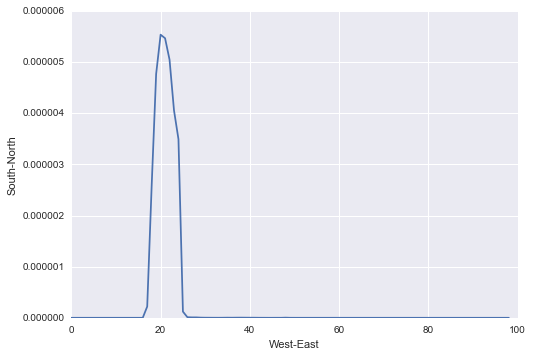

In [20]:
mm = [qcloud[2,i, :, :].mean() for i in range(qcloud.shape[1])]
print(mm)
plt.plot(mm)
np.argmax(mm)
plt.ylabel('South-North')
plt.xlabel('West-East')

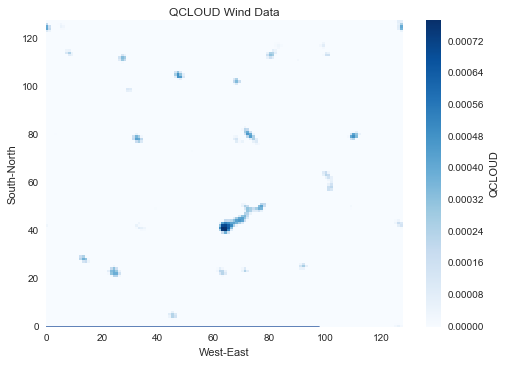

In [99]:
#plot for mean of qcloud
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()

X, Y, Z = axes3d.get_test_data(0.05)

fig = plt.figure()
dp0 = qcloud[2][24]
plt.pcolor(dp0, cmap='Blues')
cbar = plt.colorbar(orientation='vertical')
plt.title('QCLOUD Wind Data')
plt.xlim(0,128)
plt.ylim(0,128)
plt.ylabel('South-North')
plt.xlabel('West-East')
cbar.set_label('QCLOUD')
plt.plot(mm)
np.argmax(mm)
plt.show()

In [69]:
u = np.array(radar.U[2, 24, 0:127, 0:127])
u.astype(np.float64)
u

array([[-7.87291145, -8.19969082, -8.41212559, ..., -8.27336216,
        -8.298316  , -8.10333061],
       [-8.066679  , -8.3322506 , -8.4368639 , ..., -8.29403019,
        -8.26752663, -8.05774879],
       [-8.31339455, -8.49241447, -8.54440403, ..., -8.15717793,
        -8.13115788, -8.06117058],
       ..., 
       [-8.16506481, -8.08556652, -7.76696157, ..., -8.30008888,
        -8.25264454, -8.16950035],
       [-7.66714191, -7.65001678, -7.64834881, ..., -7.93632412,
        -7.93350458, -7.90695047],
       [-7.56426239, -7.51438093, -7.76025152, ..., -7.81473541,
        -7.88698339, -7.92843342]], dtype=float32)

In [70]:
v = np.array(radar.V[2, 24, 0:127, 0:127])
v.astype(np.float64)
v

array([[-3.6805532 , -4.07912159, -4.07991648, ..., -4.05269194,
        -3.82352829, -3.57242131],
       [-3.76288819, -4.0711565 , -4.02831554, ..., -3.79075694,
        -3.42999744, -3.22693205],
       [-3.62231183, -3.7647655 , -3.82889438, ..., -3.67088294,
        -3.32863927, -3.1958549 ],
       ..., 
       [-4.04842806, -4.22440958, -3.96135163, ..., -3.37142777,
        -3.38008547, -3.47892547],
       [-3.82661247, -3.83902144, -3.680969  , ..., -3.66499496,
        -3.69026375, -3.69687414],
       [-3.61973572, -3.43764877, -3.445364  , ..., -4.03307056,
        -4.05691242, -3.96231437]], dtype=float32)

In [71]:
w = np.array(radar.W[2, 24, 0:127, 0:127])
w.astype(np.float64)
w

array([[-0.31868979, -0.21865903, -0.08609351, ...,  0.04556504,
         0.28310722,  0.34166279],
       [-0.23926684, -0.14704497, -0.12824532, ...,  0.11278464,
         0.15024517,  0.04603313],
       [-0.23929612, -0.19422612, -0.11538041, ...,  0.10638589,
        -0.01143752, -0.13905275],
       ..., 
       [ 1.2379508 ,  0.63053149, -0.17469437, ..., -0.26586986,
        -0.20344891,  0.20084624],
       [ 1.36088896,  0.52949828, -0.33210528, ..., -0.3324267 ,
        -0.22725312,  0.28067452],
       [ 0.48731446, -0.20362614, -0.48680499, ..., -0.30958968,
        -0.14328048,  0.26356128]], dtype=float32)

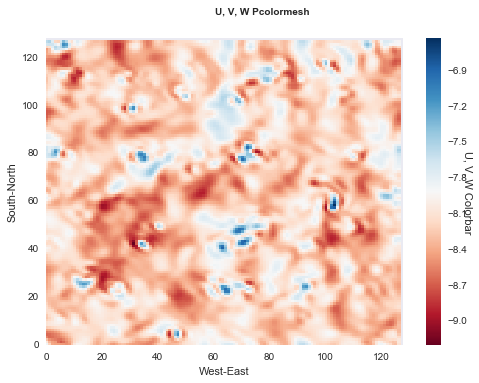

In [105]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()


dp0 = u
dp1 = v
dp2 = w
plt.pcolormesh(dp0, cmap='RdBu')
plt.xlim(0,128)
plt.ylim(0,128)
fig.suptitle('U, V, W Pcolormesh', fontsize=10, fontweight='bold')
plt.ylabel('South-North')
plt.xlabel('West-East')
cbar = plt.colorbar()
cbar.set_label('U, V, W Colorbar', rotation=270)
plt.show()

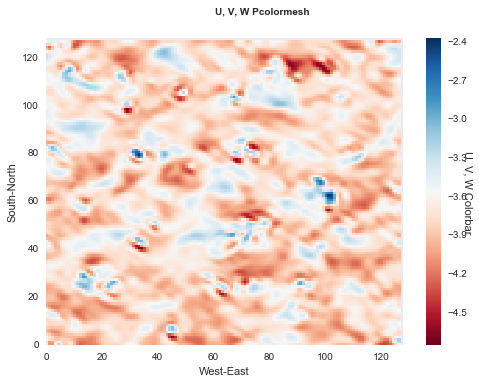

In [104]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()

plt.xlim(0,128)
plt.ylim(0,128)
dp0 = u
dp1 = v
dp2 = w
plt.pcolormesh(dp1, cmap='RdBu')

fig.suptitle('U, V, W Pcolormesh', fontsize=10, fontweight='bold')
plt.ylabel('South-North')
plt.xlabel('West-East')
cbar = plt.colorbar()
cbar.set_label('U, V, W Colorbar', rotation=270)
plt.show()

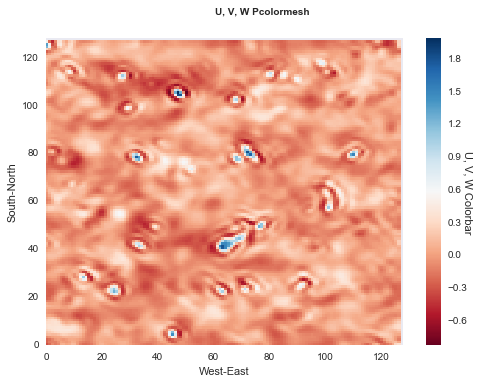

In [103]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()

plt.xlim(0,128)
plt.ylim(0,128)
dp0 = u
dp1 = v
dp2 = w
plt.pcolormesh(dp2, cmap='RdBu')

fig.suptitle('U, V, W Pcolormesh', fontsize=10, fontweight='bold')
plt.ylabel('South-North')
plt.xlabel('West-East')
cbar = plt.colorbar()
cbar.set_label('U, V, W Colorbar', rotation=270)
plt.show()

In [68]:

radar.U

<xarray.DataArray 'U' (Time: 6, bottom_top: 99, south_north: 128, west_east_stag: 129)>
[9808128 values with dtype=float32]
Coordinates:
    XLAT_U          (Time, south_north, west_east_stag) float32 0.0 0.0 0.0 ...
    XLONG_U         (Time, south_north, west_east_stag) float32 0.0 0.0 0.0 ...
  * Time            (Time) int64 0 1 2 3 4 5
  * bottom_top      (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * south_north     (south_north) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * west_east_stag  (west_east_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
Attributes:
    FieldType: 104
    MemoryOrder: XYZ
    description: x-wind component
    units: m s-1
    stagger: X

In [37]:

radar.V

<xarray.DataArray 'V' (Time: 6, bottom_top: 99, south_north_stag: 129, west_east: 128)>
[9808128 values with dtype=float32]
Coordinates:
    XLAT_V            (Time, south_north_stag, west_east) float32 0.0 0.0 ...
    XLONG_V           (Time, south_north_stag, west_east) float32 0.0 0.0 ...
  * Time              (Time) int64 0 1 2 3 4 5
  * bottom_top        (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * south_north_stag  (south_north_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
  * west_east         (west_east) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
Attributes:
    FieldType: 104
    MemoryOrder: XYZ
    description: y-wind component
    units: m s-1
    stagger: Y

In [38]:

radar.W

<xarray.DataArray 'W' (Time: 6, bottom_top_stag: 100, south_north: 128, west_east: 128)>
[9830400 values with dtype=float32]
Coordinates:
    XLAT             (Time, south_north, west_east) float32 18.0 18.0 18.0 ...
    XLONG            (Time, south_north, west_east) float32 -62.0 -62.0 ...
  * Time             (Time) int64 0 1 2 3 4 5
  * bottom_top_stag  (bottom_top_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
  * south_north      (south_north) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * west_east        (west_east) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Attributes:
    FieldType: 104
    MemoryOrder: XYZ
    description: z-wind component
    units: m s-1
    stagger: Z

In [77]:
wind_speed = np.sqrt(u**2+ v**2)
wind_speed

array([[ 8.69075394,  9.15828419,  9.34930897, ...,  9.21264553,
         9.13681602,  8.85585403],
       [ 8.90115929,  9.27365685,  9.34922409, ...,  9.11925316,
         8.95080376,  8.67988491],
       [ 9.06827831,  9.28948689,  9.36308002, ...,  8.94510651,
         8.78610134,  8.67156029],
       ..., 
       [ 9.11361885,  9.12261009,  8.71883011, ...,  8.95868301,
         8.91802216,  8.87939548],
       [ 8.5690155 ,  8.55925465,  8.48803711, ...,  8.74170589,
         8.74977398,  8.72850227],
       [ 8.38573551,  8.26337433,  8.49070358, ...,  8.79407406,
         8.86921883,  8.86340714]], dtype=float32)

In [78]:
wind_dir_trig_to = (np.arctan2((u/wind_speed), (v/wind_speed)))
wind_dir_trig_to_degrees = (wind_dir_trig_to * (180/np.pi))
#Then you must convert this wind vector to the meteorological convention of the direction the wind is coming from:
wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 
#Then you must convert that angle from "trig" coordinates to cardinal coordinates:
wind_dir_trig_from_degrees
wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
wind_dir_cardinal

array([[ 25.05589294,  26.44908142,  25.87358856, ...,  26.09784698,
         24.73834229,  23.79068756],
       [ 25.00778198,  26.04024506,  25.52288055, ...,  24.56259918,
         22.53238678,  21.8249054 ],
       [ 23.54372406,  23.90814972,  24.1379776 , ...,  24.2286377 ,
         22.26264191,  21.62586975],
       ..., 
       [ 26.37328339,  27.58541107,  27.02276611, ...,  22.10659027,
         22.27283478,  23.06639862],
       [ 26.5234375 ,  26.64894867,  25.70041656, ...,  24.78749084,
         24.94545746,  25.05831909],
       [ 25.57256317,  24.58295441,  23.94006348, ...,  27.29759979,
         27.22042084,  26.55405426]], dtype=float32)

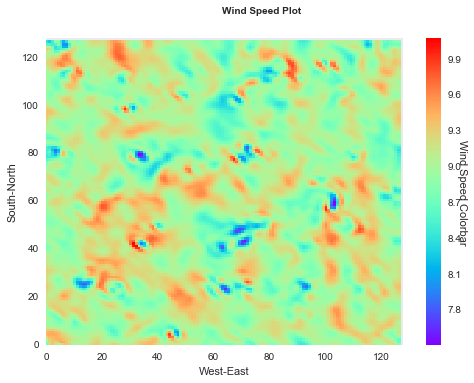

In [101]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()


wind_speed = np.sqrt(u**2+ v**2)
plt.pcolormesh(wind_speed, cmap='rainbow')
plt.xlim(0,128)
plt.ylim(0,128)
fig.suptitle('Wind Speed Plot', fontsize = 10, fontweight = 'bold')
plt.ylabel('South-North')
plt.xlabel('West-East')
cbar = plt.colorbar()
cbar.set_label('Wind Speed Colorbar', rotation = 270)
plt.show()

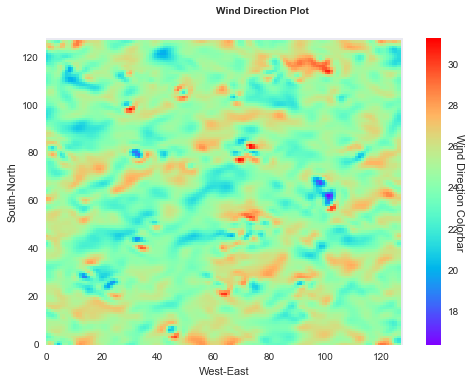

In [102]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()


wind_dir_trig_to = (np.arctan2((u/wind_speed), (v/wind_speed)))
wind_dir_trig_to_degrees = (wind_dir_trig_to * (180/np.pi))
wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 
wind_dir_trig_from_degrees
wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
plt.pcolormesh(wind_dir_cardinal, cmap = 'rainbow')
plt.xlim(0,128)
plt.ylim(0,128)
fig.suptitle('Wind Direction Plot', fontsize = 10, fontweight = 'bold')
plt.ylabel('South-North')
plt.xlabel('West-East')
cbar = plt.colorbar()
cbar.set_label('Wind Direction Colorbar', rotation = 270)
plt.show()